In [186]:
import os
import glob
import numpy as np
import pandas as pd
import scanpy as sc

base_path = r"C:\Users\aless\Desktop\git\scDEAL\save\adata"

# use glob to get all h5ad files in the directory
h5ad_files = glob.glob(os.path.join(base_path, "*.h5ad"))
h5ad_files = [os.path.join(base_path, f) for f in h5ad_files]

# open all h5ad files and store them in a list, use scanpy to read the files
adata_list = []
for f in h5ad_files:
    adata = sc.read(f)
    adata_list.append(adata)



Only considering the two last: ['.5_mod_new_sam_upsampling_seed_10', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_10', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_100', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_100', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_1000', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_1000', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_20', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_20', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_412', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_412', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_42', '.h5ad'].
Only considering the two last: ['.5_mod_new_sam_upsampling_seed_42', '.h5ad'].
Only considering the two last: ['.5_mod_new_

In [187]:
h5ad_files
# they all end with seed_number.h5ad, get the seed number
seed_numbers = [int(f.split("_")[-1].split(".")[0]) for f in h5ad_files]
seed_numbers

[10, 100, 1000, 20, 412, 42, 446, 5, 64, 900]

In [188]:
y_repo = [adata_list[i].obs['sensitive'].values for i in range(len(adata_list))]
y_hat_repo = [adata_list[i].obs['sens_label'].values for i in range(len(adata_list))]

In [189]:
# import f1_score
from sklearn.metrics import f1_score
f1_repo = []
seed_bank = {}
for i in range(len(y_repo)):
    f1 = f1_score(y_repo[i], y_hat_repo[i])
    print(f"for seed {seed_numbers[i]} the f1 score is {f1}")
    f1_repo.append(f1)
    seed_bank[seed_numbers[i]] = f1


    

for seed 10 the f1 score is 0.3839009287925696
for seed 100 the f1 score is 0.7207207207207208
for seed 1000 the f1 score is 0.4641833810888252
for seed 20 the f1 score is 0.7421052631578947
for seed 412 the f1 score is 0.7795620437956203
for seed 42 the f1 score is 0.48854961832061067
for seed 446 the f1 score is 0.705710102489019
for seed 5 the f1 score is 0.49786628733997157
for seed 64 the f1 score is 0.19272727272727275
for seed 900 the f1 score is 0.5454545454545454


C:\Users\aless\AppData\Local\Temp\ipykernel_8584\184034044.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f1_repo, shade=True, bw_adjust=0.1)


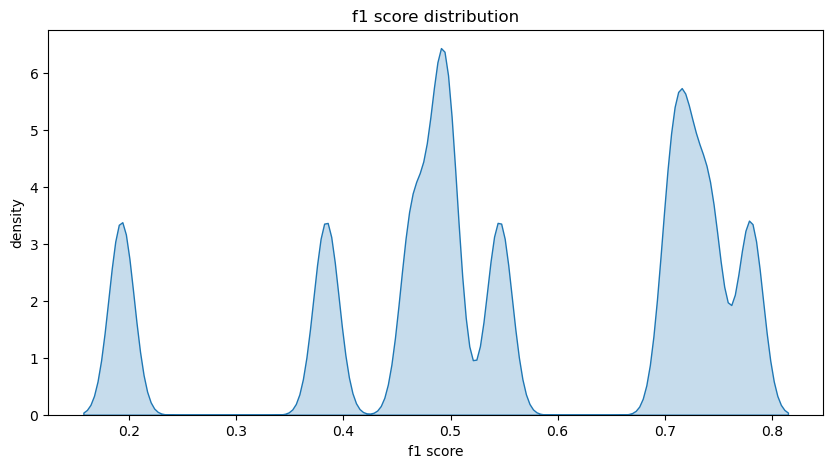

In [190]:
# kdeplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.kdeplot(f1_repo, shade=True, bw_adjust=0.1)
plt.title('f1 score distribution')
plt.xlabel('f1 score')
plt.ylabel('density')
plt.show()

In [191]:
logs_path = r"C:\Users\aless\Desktop\git\scDEAL\save\logs"

# use glob to get the ones endng in bulk.log
bulk_log_files = glob.glob(os.path.join(logs_path, "*bulk.log"))
bulk_log_files = [os.path.join(logs_path, f) for f in bulk_log_files]
bulk_log_files

['C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-11-49-19bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-12-36-40bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-13-04-59bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-13-35-55bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-14-07-12bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-14-38-24bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-15-09-30bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-15-39-12bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-16-09-44bulk.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-16-36-40bulk.log']

In [192]:
# get the text from the first file
import re
def find_seed_of_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        # in the text there is the line seed=number, get the number
        seed_number = int(re.findall(r'seed=(\d+)', text)[0])
        return seed_number


def split_bulk_log_in_two(text):


    # find all lines containing Epoch 0/
    indexes = [i for i, t in enumerate(text) if re.findall(r'Epoch 0/', t)]
    return indexes
    




def get_bulk_AE_logs_procedure(text, start):

    # ignore first 4 lines
    text = text[start:]
    # group the lines 4 by 4
    text = [text[i:i+4] for i in range(0, len(text), 4)]
    # start with infinite limit

    records = []
    lim = float('inf')
    for n, group in enumerate(text):
        # in elem0m there is Epoch x/y, get x


        epoch =re.findall(r'Epoch (\d+)', group[0])[0]
        if n == 0:
            lim = re.findall(r"/(\d+)", group[0])[0]



        training_loss = re.findall(r'Loss: (\d+\.\d+)', group[2])[0]
        validation_loss = re.findall(r'Loss: (\d+\.\d+)', group[3])[0]
        #learning_rate = re.findall(r'Learning rate = (\d+\.\d+)', group[3][0])[0] # learning rate can be in scientific notation like 1e-5
        learning_rate = re.findall(r'Learning rate = ([\d\.e-]+)', group[3])[0]
        training_loss = float(training_loss)
        validation_loss = float(validation_loss)
        learning_rate = float(learning_rate)

        records.append([epoch, training_loss, validation_loss, learning_rate])
        #print(f"epoch {epoch} training_loss {training_loss} validation_loss {validation_loss} learning_rate {learning_rate}")

        if epoch == lim:

            break
    
    df = pd.DataFrame(records, columns=['epoch', 'training_loss', 'validation_loss', 'learning_rate'])
    return df
def magic_procedure(file_path):
    # open the file and get the text
    with open(file_path, 'r') as file:
        text = file.read()
    # separate the text by the new line
    text = text.split("\n")
    # at each line, ignore everything up until "INFO:"
    text = [re.findall(r'INFO:(.*)', t) for t in text]
    text = [t[0] for t in text if t]

    # get the seed number
    seed_number = find_seed_of_file(file_path)
    # get the start of the AE logs
    start_bulk, start_mlp = split_bulk_log_in_two(text)

    df1 = get_bulk_AE_logs_procedure(text, start_bulk)
    df2 = get_bulk_AE_logs_procedure(text, start_mlp)
    return seed_number, df1, df2



In [193]:
complete_mess = [magic_procedure(f) for f in bulk_log_files]
# unzip it in three lists
seed_numbers, df1_list, df2_list = zip(*complete_mess)
seed_numbers

(5, 10, 20, 42, 64, 100, 412, 446, 900, 1000)

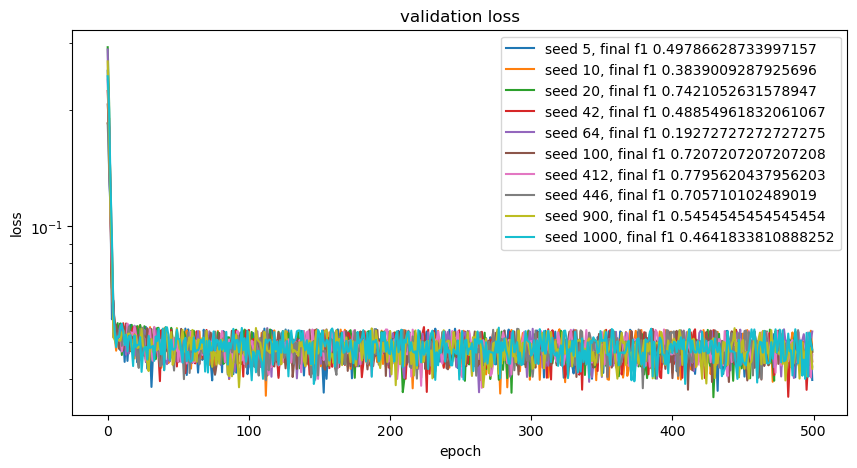

In [194]:
validation_losees = [df['validation_loss'].values for df in df1_list]
# plot the validation losses on a single plot use seed as legend
plt.figure(figsize=(10, 5))
for i in range(len(validation_losees)):
    plt.semilogy(validation_losees[i], label=f"seed {seed_numbers[i]}, final f1 {seed_bank[seed_numbers[i]]}")
plt.legend()
plt.title('validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

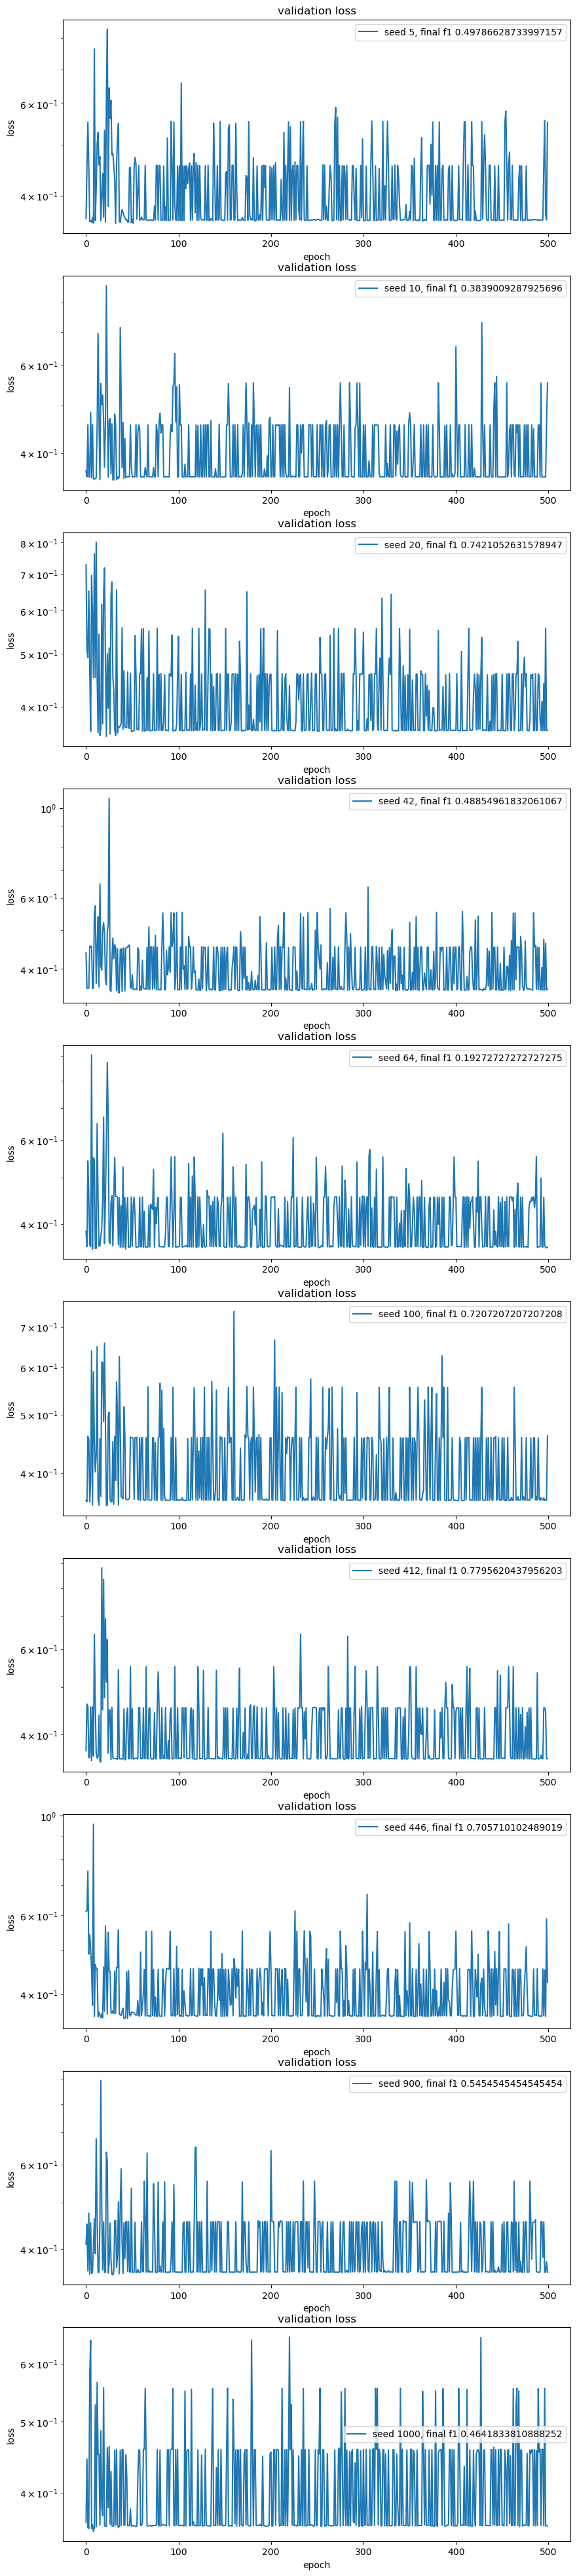

In [195]:
# do the same for the MLP
validation_losees = [df['validation_loss'].values for df in df2_list]
# plot the validation losses on a single plot use seed as legend
fig, axs = plt.subplots(len(validation_losees), 1, figsize=(10, 5*len(validation_losees)))
for i in range(len(validation_losees)):
    axs[i].semilogy(validation_losees[i], label=f"seed {seed_numbers[i]}, final f1 {seed_bank[seed_numbers[i]]}")
    axs[i].legend()
    axs[i].set_title('validation loss')
    axs[i].set_xlabel('epoch')
    axs[i].set_ylabel('loss')

In [196]:
# now get the transfer.log files
transfer_log_files = glob.glob(os.path.join(logs_path, "*transfer.log"))
transfer_log_files = [os.path.join(logs_path, f) for f in transfer_log_files]
transfer_log_files

['C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-12-13-01transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-12-57-48transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-13-28-43transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-13-59-55transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-14-31-03transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-15-02-14transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-15-32-51transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-16-02-27transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-16-29-44transfer.log',
 'C:\\Users\\aless\\Desktop\\git\\scDEAL\\save\\logs\\2024-11-03-17-00-18transfer.log']

In [197]:
complete_mess = [magic_procedure(f) for f in transfer_log_files]
# unzip it in three lists
seed_numbers, df1_list_sc, df2_list_sc = zip(*complete_mess)
seed_numbers

(5, 10, 20, 42, 64, 100, 412, 446, 900, 1000)

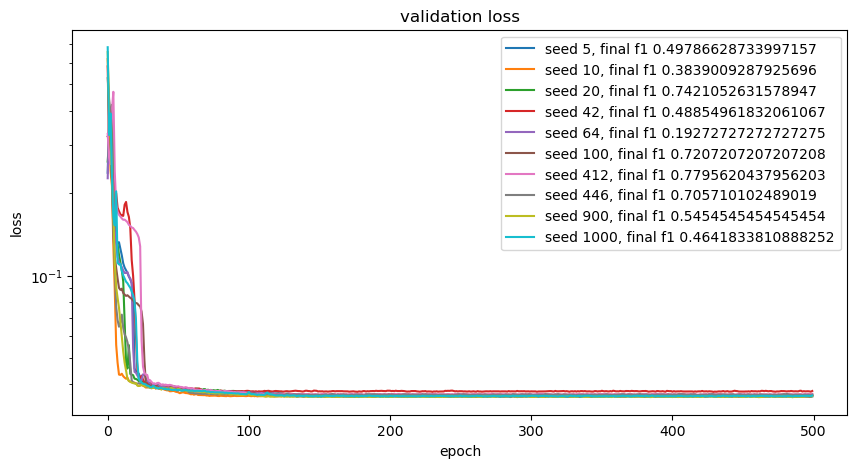

In [198]:
# get the validation losses for the AE
validation_losees = [df['validation_loss'].values for df in df1_list_sc]
# plot the validation losses on a single plot use seed as legend
plt.figure(figsize=(10, 5))
for i in range(len(validation_losees)):
    plt.semilogy(validation_losees[i], label=f"seed {seed_numbers[i]}, final f1 {seed_bank[seed_numbers[i]]}")
plt.legend()
plt.title('validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


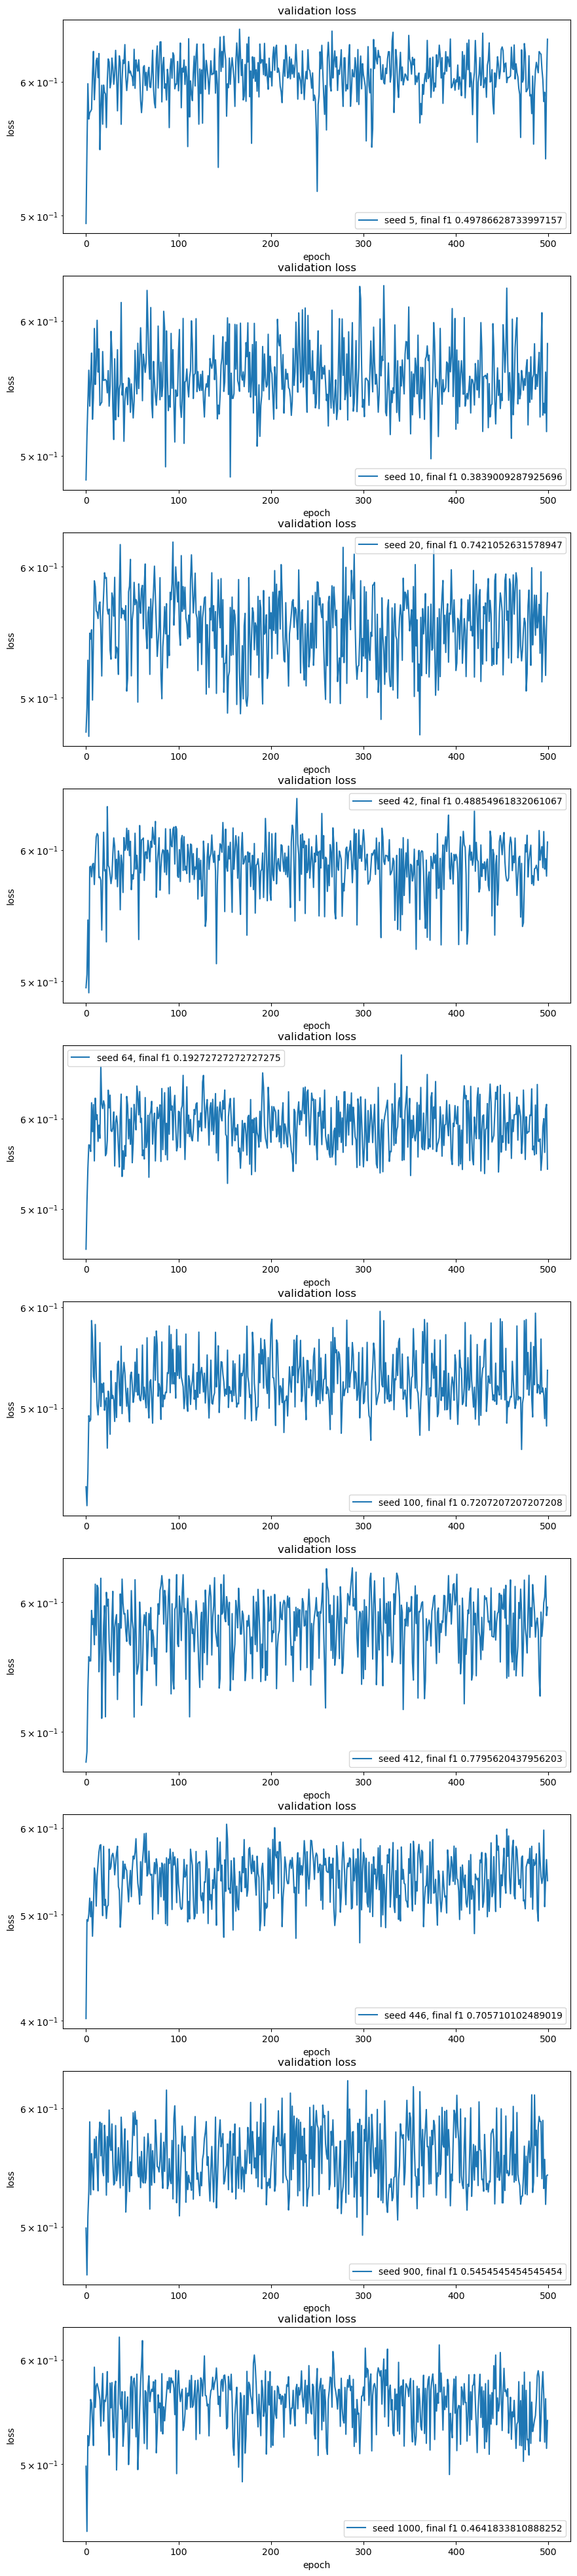

In [199]:
# now on the MLP
validation_losees = [df['validation_loss'].values for df in df2_list_sc]
# plot the validation losses on a single plot use seed as legend
fig, axs = plt.subplots(len(validation_losees), 1, figsize=(10, 5*len(validation_losees)))
for i in range(len(validation_losees)):
    axs[i].semilogy(validation_losees[i], label=f"seed {seed_numbers[i]}, final f1 {seed_bank[seed_numbers[i]]}")
    axs[i].legend()
    axs[i].set_title('validation loss')
    axs[i].set_xlabel('epoch')
    axs[i].set_ylabel('loss')

    

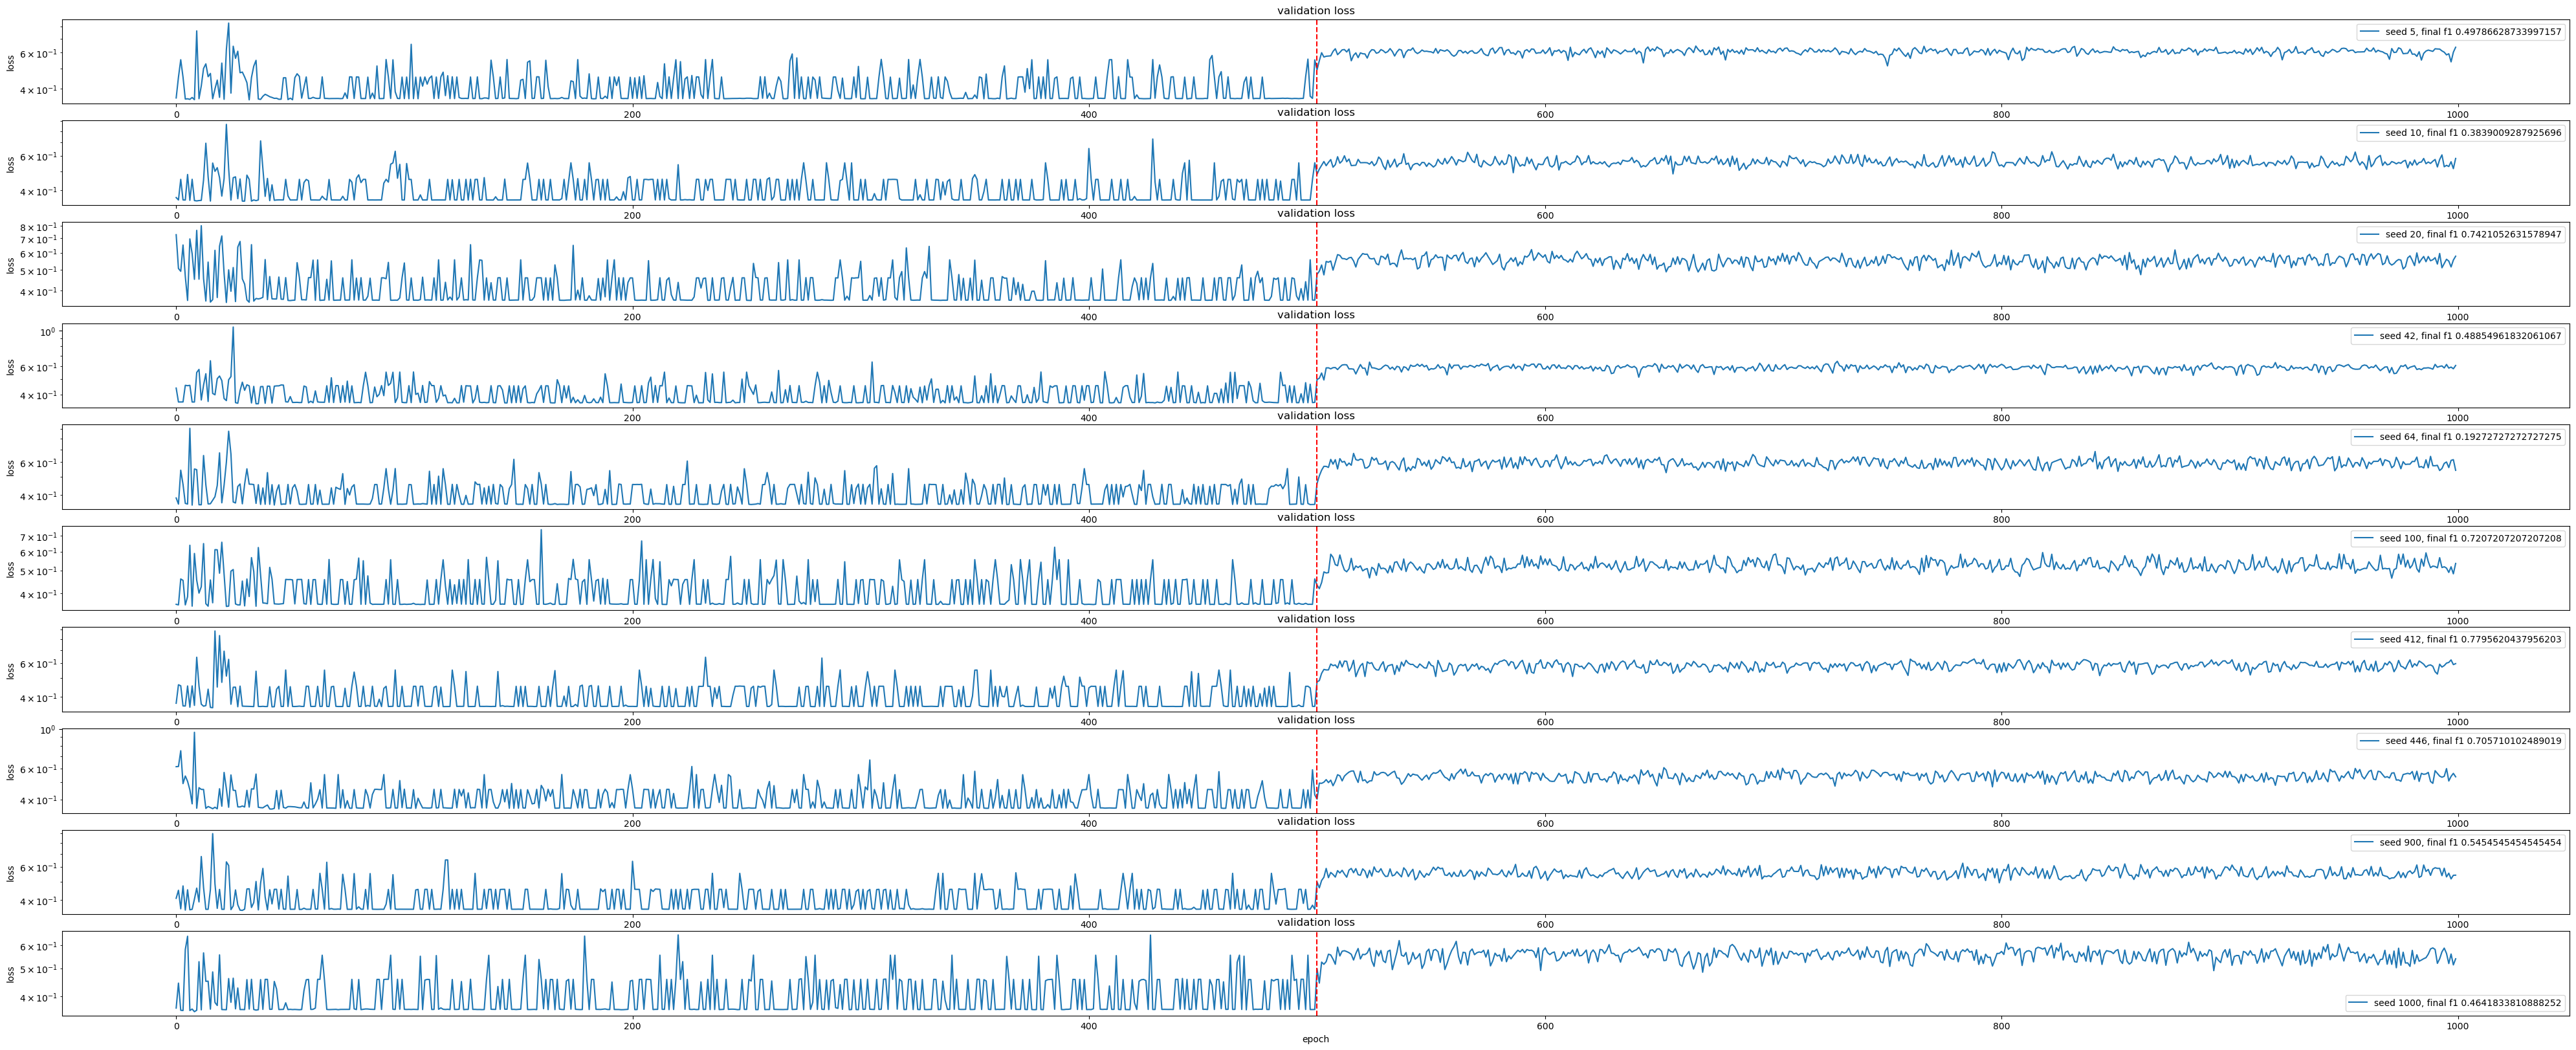

In [218]:
# now for each seed concatenate df2_list and df2_list_sc for validation loss, they have the same indexes, so we need to use them as lists
# get the validation losses for the MLP
val_losses_bulk = [df['validation_loss'].values for df in df2_list]
val_losses_sc = [df['validation_loss'].values for df in df2_list_sc]

val_losses_united = [np.concatenate([val_losses_bulk[i], val_losses_sc[i]]) for i in range(len(val_losses_bulk))]
fig, axs = plt.subplots(len(val_losses_united), 1, figsize=(50, 20))
for i in range(len(val_losses_united)):
    axs[i].semilogy(val_losses_united[i], label=f"seed {seed_numbers[i]}, final f1 {seed_bank[seed_numbers[i]]}")
    axs[i].legend()
    axs[i].set_title('validation loss')
    axs[i].set_xlabel('epoch')
    axs[i].set_ylabel('loss')
    # vertical line to separate the two trainings
    axs[i].axvline(len(val_losses_bulk[i]), color='r', linestyle='--')